# Linear Regression — Hands-On Guide

## Objective
This notebook covers **Linear Regression**, one of the most fundamental algorithms in Machine Learning.  
You will learn:

1. The concept and mathematics behind Linear Regression  
2. How to implement it using **Scikit-learn**  
3. How to visualize predictions  
4. How to evaluate model performance  

---

## What is Linear Regression?

Linear Regression models the relationship between **dependent variable (target)** and one or more **independent variables (features)** using a straight line.

**Equation (Simple Linear Regression):**
\[
y = m \cdot x + b
\]

Where:  
- \( y \): Target variable  
- \( x \): Feature (input variable)  
- \( m \): Slope (coefficient)  
- \( b \): Intercept (bias)

Goal → Find best-fit line that minimizes the **Mean Squared Error (MSE)** between predicted and actual values.

---

## Libraries Used
- `numpy` — for numerical computations  
- `pandas` — for data manipulation  
- `matplotlib` / `seaborn` — for visualization  
- `sklearn.linear_model` — for Linear Regression  
- `sklearn.metrics` — for model evaluation  


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Set style
sns.set(style="whitegrid", palette="pastel")


## Dataset

We’ll use a **synthetic dataset** that simulates a relationship between:
- `Experience (years)` — independent variable (X)
- `Salary ($)` — dependent variable (y)

This helps visualize how regression fits a line to predict salary based on years of experience.


In [3]:
# Generate a simple dataset
np.random.seed(42)

# 50 samples of experience (1–10 years)
X = np.random.uniform(1, 10, 50)

# Generate salary with some noise
y = 2500 * X + np.random.normal(0, 4000, size=50) + 20000

# Create a DataFrame for visualization
df = pd.DataFrame({
    'Experience (Years)': X,
    'Salary ($)': y
})

df.head()


,Experience (Years),Salary ($)
0,4.370861,33881.018994
1,9.556429,44576.545019
2,7.587945,38507.270561
3,6.387926,34765.401112
4,2.404168,20096.331448


## Visualizing the Relationship

Let’s visualize the scatter plot of experience vs salary to see if there’s a linear pattern.

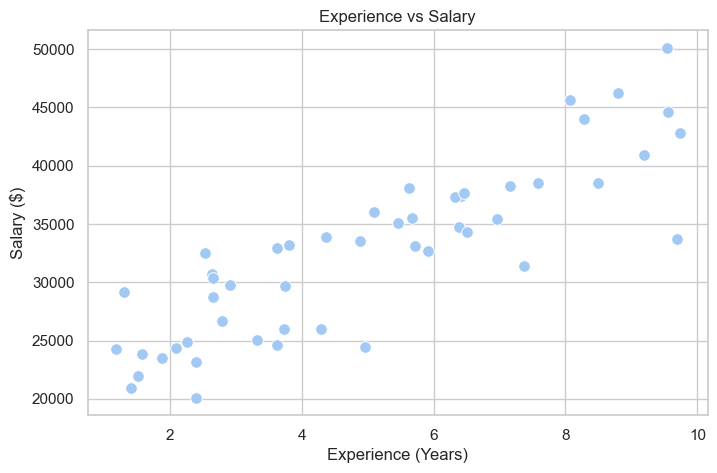

In [4]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Experience (Years)", y="Salary ($)", s=70)
plt.title("Experience vs Salary")
plt.xlabel("Experience (Years)")
plt.ylabel("Salary ($)")
plt.show()

## Train-Test Split

We’ll split the data into:
- **Training set** → to train the model (80%)
- **Testing set** → to evaluate its performance (20%)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Ensure X arrays are 2D
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")


Training samples: 40
Testing samples: 10


## Model Training

We’ll use **Scikit-learn’s `LinearRegression`** to:
1. Fit the model on training data  
2. Retrieve learned coefficients and intercept


In [8]:
# Initialize model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Retrieve parameters
m = model.coef_[0]
b = model.intercept_

print(f"Slope (Coefficient): {m:.2f}")
print(f"Intercept: {b:.2f}")


Slope (Coefficient): 2377.20
Intercept: 20617.49


## Making Predictions

Now we’ll use the trained model to predict salaries for the test dataset.


In [9]:
# Predictions
y_pred = model.predict(X_test)

# Compare few values
comparison = pd.DataFrame({
    "Actual Salary": y_test.flatten(),
    "Predicted Salary": y_pred.flatten()
}).head(10)

comparison


,Actual Salary,Predicted Salary
0,29724.335146,27537.627775
1,24453.155451,32411.639805
2,37615.341590,35992.958675
3,35399.723224,37169.187497
4,33070.170208,34221.720520
5,32681.940470,34691.417762
6,26704.619612,27266.656146
7,45591.419246,39793.333144
8,23820.356686,24386.447087
9,32954.836163,29225.460807


## Visualizing the Regression Line

We’ll overlay the predicted regression line on the scatter plot to visualize the fit.


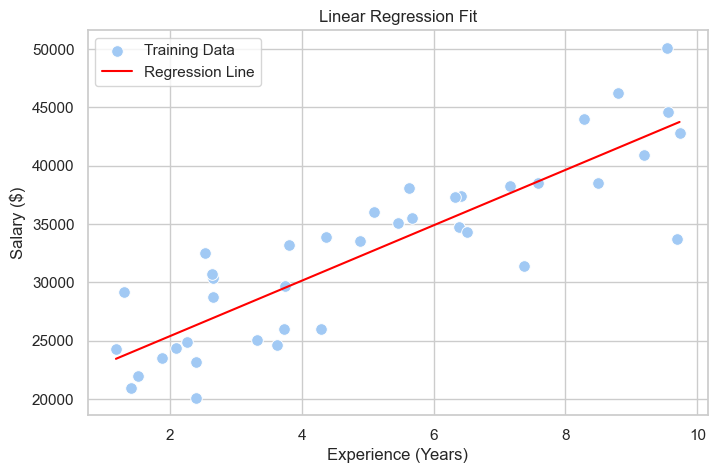

In [12]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_train.flatten(), y=y_train.flatten(), label="Training Data", s=70)

# ✅ Fix: reshape X to 2D before predicting
sns.lineplot(x=X.flatten(), y=model.predict(X.reshape(-1, 1)), color="red", label="Regression Line")

plt.xlabel("Experience (Years)")
plt.ylabel("Salary ($)")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()


## Model Evaluation

We’ll use:
- **Mean Squared Error (MSE)** → average squared difference between predicted and actual values  
- **Root Mean Squared Error (RMSE)** → square root of MSE  
- **R² Score (Coefficient of Determination)** → how well the model explains variance in data  

\[
R^2 = 1 - \frac{SS_{res}}{SS_{tot}}
\]


In [13]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error: 12740874.60
Root Mean Squared Error: 3569.44
R² Score: 0.6708


## Interpretation of Results

- **R² Score** close to 1 → strong linear relationship  
- **Lower RMSE** → better predictive performance  

Since our data was synthetic with random noise, perfect accuracy isn’t expected.  
However, we can see that Linear Regression effectively captures the general linear trend.

---

## Key Takeaways
- Linear Regression models the relationship between numeric variables.
- It finds the best-fit line minimizing squared errors.
- Metrics like MSE and R² help quantify performance.
- Works best for data showing **linear correlation** between features and target.

---

## Next Steps
Try:
- Adding multiple features (Multiple Linear Regression)
- Using real datasets (e.g., Boston Housing)
- Regularized versions: **Ridge**, **Lasso**
